In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('Master_data.csv')
df.sample(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,profit,profit/km,day_of_week,month,year
107502,10131686,2017-01-03,Pink Cab,LOS ANGELES CA,37.74,575.26,422.6880,8084,Cash,Female,39,16608,1595037,144132,152.5720,4.042713,Tuesday,January,2017
28318,10035935,2016-05-20,Yellow Cab,WASHINGTON DC,4.24,71.35,55.4592,51102,Card,Female,19,19389,418859,127001,15.8908,3.747830,Friday,May,2016
227837,10278495,2017-12-17,Yellow Cab,NEW YORK NY,37.44,881.71,449.2800,2360,Cash,Male,26,23250,8405837,302149,432.4300,11.549947,Sunday,December,2017
299430,10367851,2018-09-02,Pink Cab,LOS ANGELES CA,23.98,327.81,258.9840,8384,Card,Male,21,8686,1595037,144132,68.8260,2.870142,Sunday,September,2018
303202,10372405,2018-09-10,Yellow Cab,DENVER CO,35.00,627.04,436.8000,32583,Cash,Male,23,16928,754233,12421,190.2400,5.435429,Monday,September,2018


In [3]:
print(df.shape)
df.info()

(359392, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  int64  
 13  Users               359392 non-null  int64  
 14  profit              359392 non-null  float64
 15  profit/km           3

### Compare Yellow Cab and Pink Cab from Different Aspects

### What's the profit rate of Cab market? Which company has higher profit rate?

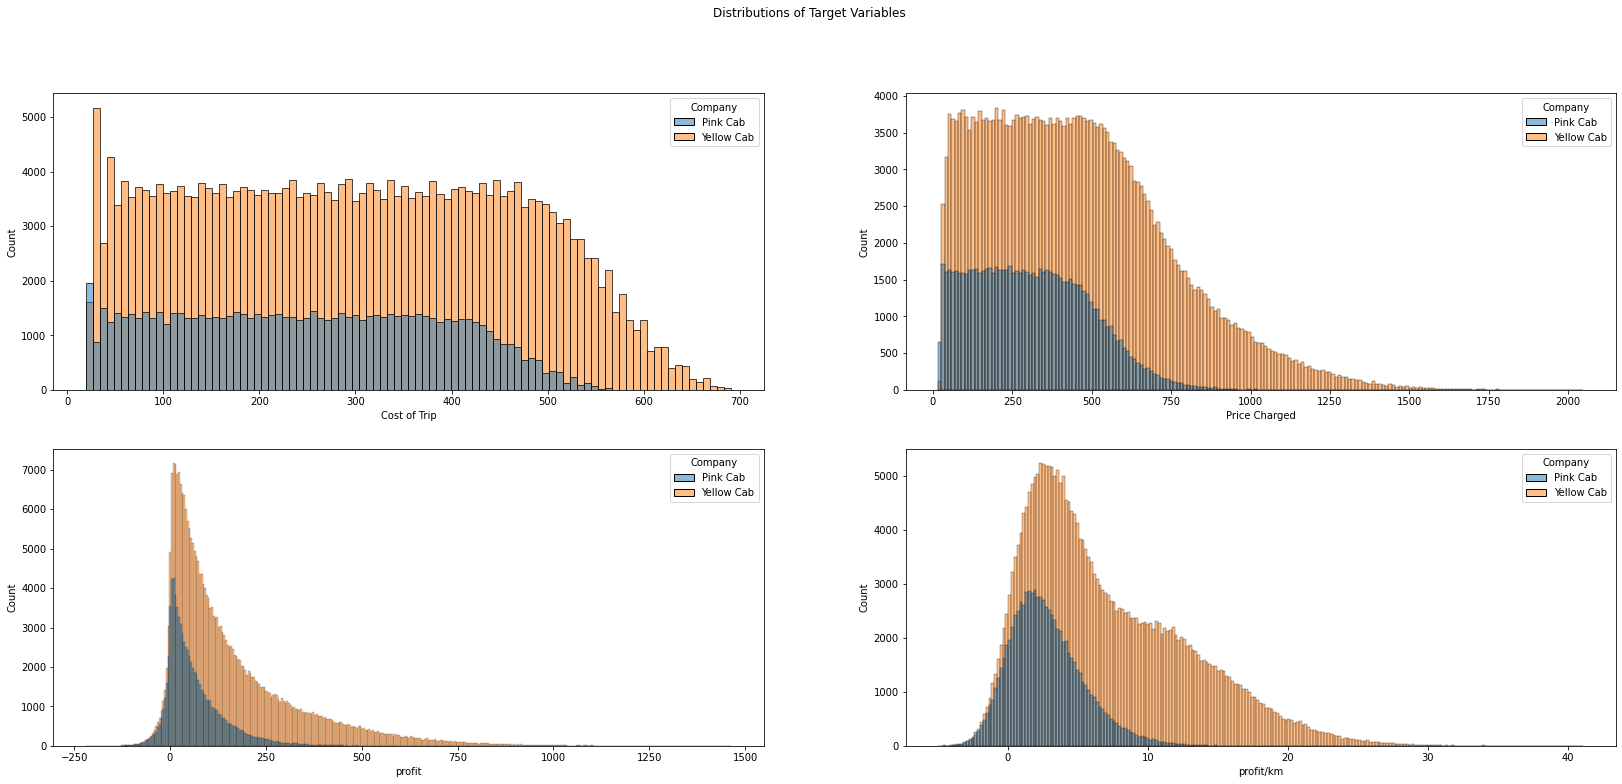

In [4]:
plt.figure(figsize=[28, 12])

plt.subplot(2, 2, 1)
plt.suptitle('Distributions of Target Variables')
sns.histplot(data=df , x='Cost of Trip' , hue="Company")

plt.subplot(2, 2, 2)
sns.histplot(data=df , x='Price Charged' , hue="Company")

plt.subplot(2, 2, 3)
sns.histplot(data=df , x='profit' , hue="Company")

plt.subplot(2, 2, 4)
sns.histplot(data=df , x='profit/km' , hue="Company");

- From the above plots we can observe that profit distribution is skewed to the right. Also, it can be noted that Yellow cab consistently have higher prices hence higher profits as compared to Pink Cab.  
- It is also interesting to see Pink cab has a longer distribution below 0 which implies more loses.

### Which Taxi Cab has the bigger market Share

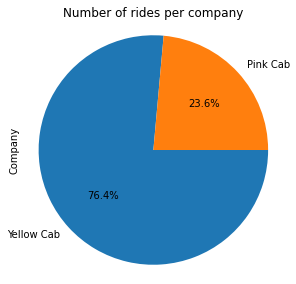

Text(0.5, 1.0, '')

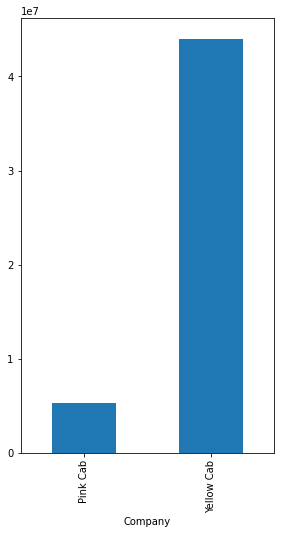

In [5]:
labels=['Pink Cab', 'Yellow Cab']
plt.figure(figsize=[10, 8])

plt.subplot(1, 2, 1)
company = df['Company'].value_counts()
company.plot(kind='pie', autopct='%1.1f%%', counterclock = False)
plt.axis('square')
plt.title('Number of rides per company')
plt.show()

plt.subplot(1, 2, 2)
ax=df.groupby('Company')['profit'].sum()
ax.plot(figsize=(10,8), kind='bar')
#sns.barplot(data=df, x='Company', y='profit', ci=None)
plt.title('')

#### Market share per city

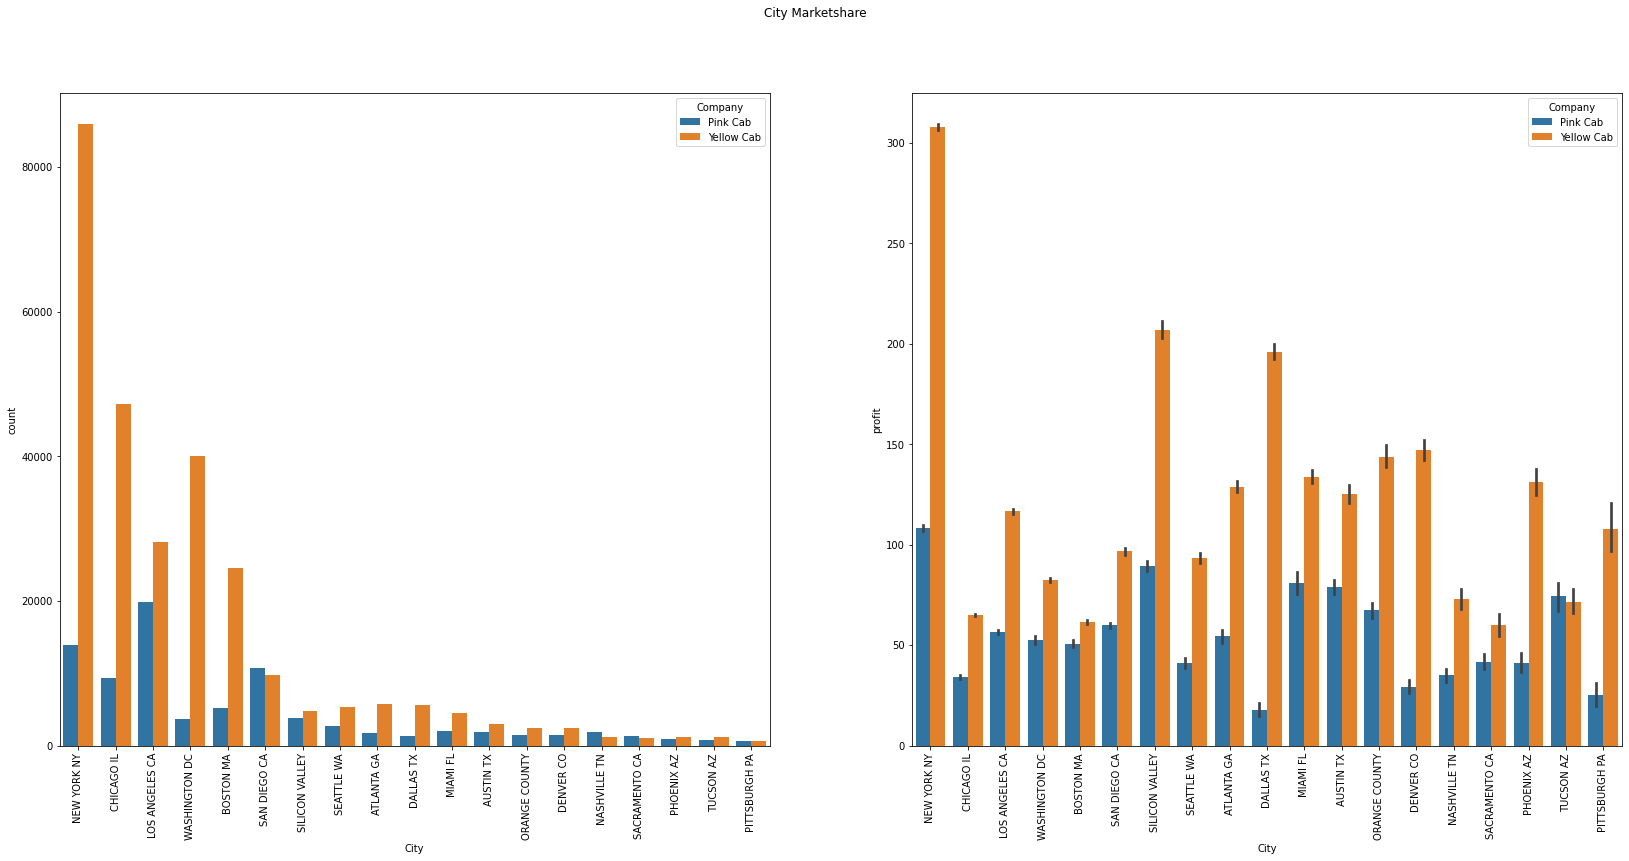

In [11]:
plt.figure(figsize=[28, 12])
plt.suptitle('Cities Marketshare')
plt.subplot(1, 2, 1)
sns.countplot(x='City', data=df, order = df['City'].value_counts().index, hue='Company')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='City', y='profit', hue='Company', order = df['City'].value_counts().index)
plt.xticks(rotation=90);

As for marketshare, Yellow cab leads in most cities, except in San Diego, Nashville, and Sacramento where Pink Taxi has a slight lead. As for profits, Yellow cab leads in all but Tuscon where Pink Cab only leads. This can be attributed to the fact that Yellow cab generates higher profits per kilometer.

### Market share as per the population

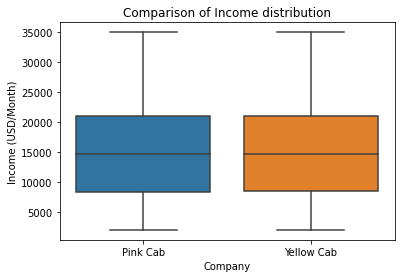

In [19]:

sns.boxplot(x='Company', y='Income (USD/Month)', data=df)
plt.title('Comparison of Income distribution');

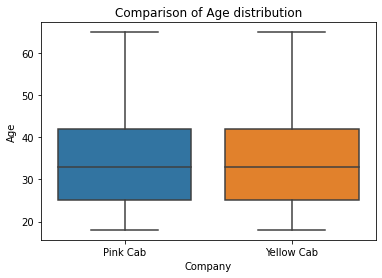

In [20]:
sns.boxplot(x='Company', y='Age', data=df)
plt.title('Comparison of Age distribution');

From the above charts it can be observed that the age and income distibution is similar between the two cab companies.


### Daily Market share

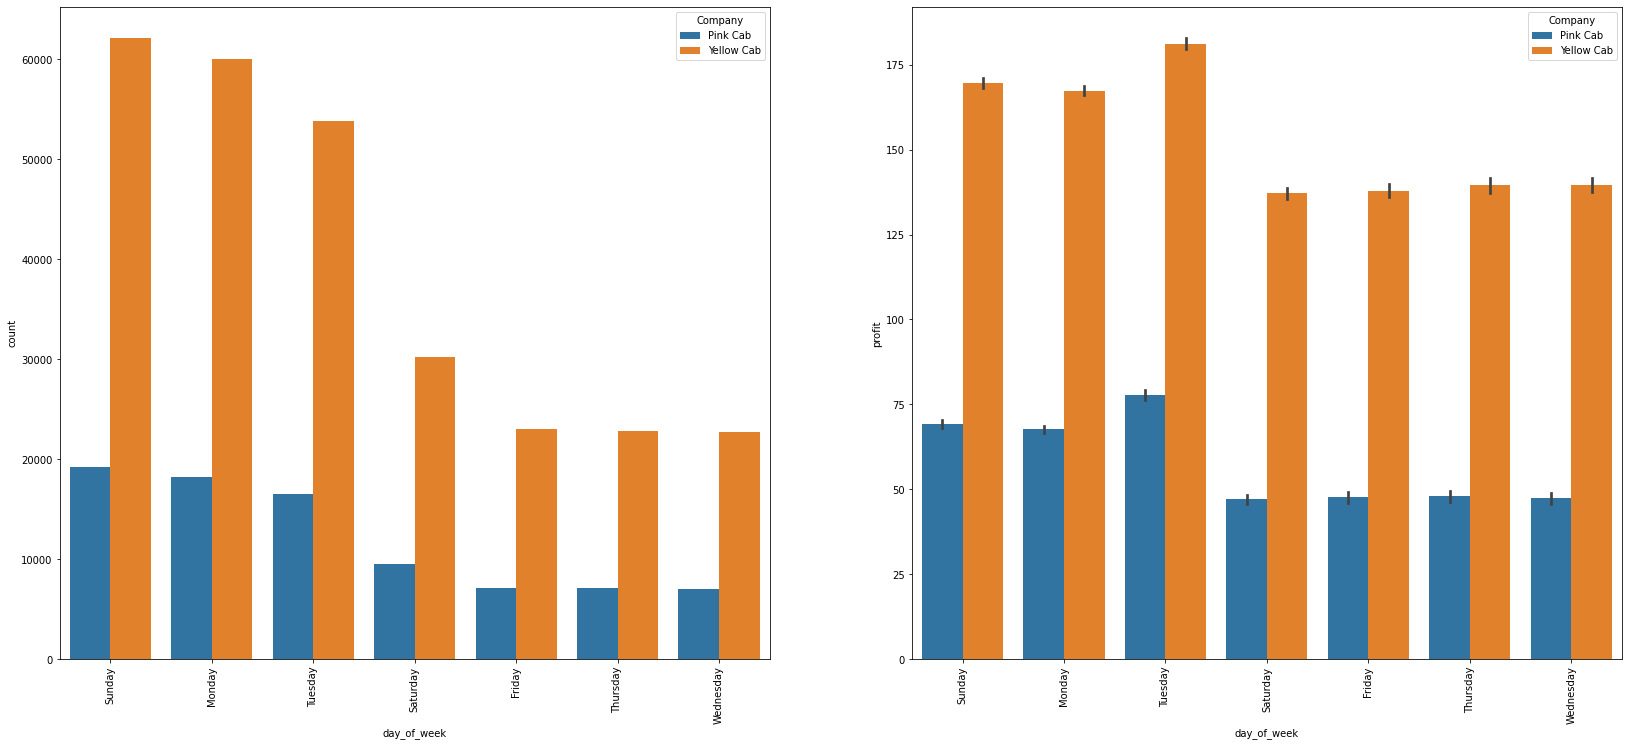

In [21]:
plt.figure(figsize=[28, 12])
plt.suptitle('')
plt.subplot(1, 2, 1)
sns.countplot(x='day_of_week', data=df, order = df['day_of_week'].value_counts().index, hue='Company')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='day_of_week', y='profit', hue='Company', order = df['day_of_week'].value_counts().index)
plt.xticks(rotation=90);